In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import pickle

%matplotlib inline
mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
car=pd.read_csv('cotationprice.csv')

In [3]:
car.head()

,brand,model,year,Energy,gear_box,Trim,price
0,PEUGEOT,2008,2021,Electrique,Automatique,e-2008 136ch GT Pack,36 890 €
1,NISSAN,Qashqai,2020,Diesel,Manuelle,1.5 dCi 115ch N-Connecta Euro6d-T,21 890 €
2,RENAULT,Captur,2018,Essence,Manuelle,0.9 TCe 90ch energy Business Euro6c,14 999 €
3,RENAULT,Kadjar,2021,Diesel,Manuelle,1.5 Blue dCi 115ch Business - 21,23 780 €
4,PEUGEOT,2008,2018,Essence,Manuelle,1.2 PureTech 130ch Crossway S&S,16 490 €


In [4]:
car.shape

(44399, 7)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44399 entries, 0 to 44398
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     44399 non-null  object
 1   model     44399 non-null  object
 2   year      44399 non-null  int64 
 3   Energy    44390 non-null  object
 4   gear_box  44354 non-null  object
 5   Trim      44394 non-null  object
 6   price     44399 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.4+ MB


##### Check for null values

In [6]:
car.isnull().sum()

brand        0
model        0
year         0
Energy       9
gear_box    45
Trim         5
price        0
dtype: int64

## Cleaning Data

#### year is an object. Change to integer

In [7]:
car['year']=car['year'].astype(np.int64)

#### Check for null values

#### Price has commas in its prices and is in object

In [8]:
car['price'] = car['price'].str.replace(r'[^A-Za-z0-9]+', '', regex=True)
car['price'] = car['price'].astype(np.int64)

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44399 entries, 0 to 44398
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     44399 non-null  object
 1   model     44399 non-null  object
 2   year      44399 non-null  int64 
 3   Energy    44390 non-null  object
 4   gear_box  44354 non-null  object
 5   Trim      44394 non-null  object
 6   price     44399 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.4+ MB


#### gear_box & Trim has nan values

In [10]:
car=car[~car['gear_box'].isna()]
car=car[~car['Trim'].isna()]

In [11]:
car.shape

(44349, 7)

### check null values

In [12]:
car.isnull().sum()

brand       0
model       0
year        0
Energy      0
gear_box    0
Trim        0
price       0
dtype: int64

#### Resetting the index of the final cleaned data

In [13]:
car=car.reset_index(drop=True)

## Cleaned Data

In [14]:
car

,brand,model,year,Energy,gear_box,Trim,price
0,PEUGEOT,2008,2021,Electrique,Automatique,e-2008 136ch GT Pack,36890
1,NISSAN,Qashqai,2020,Diesel,Manuelle,1.5 dCi 115ch N-Connecta Euro6d-T,21890
2,RENAULT,Captur,2018,Essence,Manuelle,0.9 TCe 90ch energy Business Euro6c,14999
3,RENAULT,Kadjar,2021,Diesel,Manuelle,1.5 Blue dCi 115ch Business - 21,23780
4,PEUGEOT,2008,2018,Essence,Manuelle,1.2 PureTech 130ch Crossway S&S,16490
...,...,...,...,...,...,...,...
44344,PEUGEOT,308,2022,Essence,Manuelle,PURETECH 130CH S&S BVM6 ALLURE,27800
44345,CITROËN,JUMPY,2019,Diesel,Manuelle,FGN M BLUEHDI 120 S&S BVM6 BUSINESS,20980
44346,CITROËN,C3,2020,Essence,Manuelle,PURETECH 82 S&S BVM5 FEEL BUSINESS,13980
44347,LAND,ROVER RANGE,2016,Diesel,Manuelle,MARK IV ED4 150 2WD E-CAPABILITY PURE,22990


In [15]:
car.to_csv('Cleaned_Car_data.csv')

In [16]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44349 entries, 0 to 44348
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     44349 non-null  object
 1   model     44349 non-null  object
 2   year      44349 non-null  int64 
 3   Energy    44349 non-null  object
 4   gear_box  44349 non-null  object
 5   Trim      44349 non-null  object
 6   price     44349 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.4+ MB


In [17]:
car.describe()

,year,price
count,44349.000000,44349.000000
mean,2019.905996,28105.186836
std,1.700049,15196.304152
min,2009.000000,0.000000
25%,2019.000000,17900.000000
50%,2020.000000,24900.000000
75%,2021.000000,33999.000000
max,2022.000000,269800.000000


In [18]:
car.isna().sum()

brand       0
model       0
year        0
Energy      0
gear_box    0
Trim        0
price       0
dtype: int64

In [19]:
# car=car[car['price']<6000000]

### Checking relationship of Company with Price

In [20]:
car['brand'].unique()
car['model'].unique()

array(['2008', 'Qashqai', 'Captur', 'Kadjar', 'Clio', '308', 'Megane',
       '3008', 'C3 Aircross', '208', 'Mini', 'Duster', 'Polo', 'C3',
       'Twingo', 'C5 Aircross', 'Ds 7 Crossback', 'Corsa', 'Panamera',
       'C4', 'Serie 1', 'Xceed', '508 Sw', 'Rav4', 'Zoe', 'Kangoo',
       'Serie 3 Touring', 'Kuga', 'Taigo', 'Corolla', 'A3 Sportback',
       'Xc40', '718 Cayman', 'Yaris', 'Partner', 'B-Max', 'X4',
       'Classe E', 'C4 Cactus', 'Kangoo Express', 'Serie 4 Gran Coupe',
       'Nv300', 'Lodgy', 'Sprinter', 'Classe C Break', '508', 'Niro',
       'E-Pace', 'Espace', 'Swift', 'Scenic', 'Sandero', 'A4 Avant',
       'Tiguan Allspace', 'Ceed Sw', 'Discovery Sport', '308 Sw', 'Golf',
       'Combo Life', 'Stelvio', 'Fiesta', 'Arona', 'Ecosport', 'Leon St',
       'Glc', 'Talisman', 'X3', 'Ds 3', 'Berlingo Van', 'Talisman Estate',
       'T-Roc', '108', 'Crossland X', 'Rx', 'Astra Sports Tourer',
       'Classe A', 'Serie 4 Coupe', 'Grand Scenic', 'Traveller', 'Mokka',
       'Care

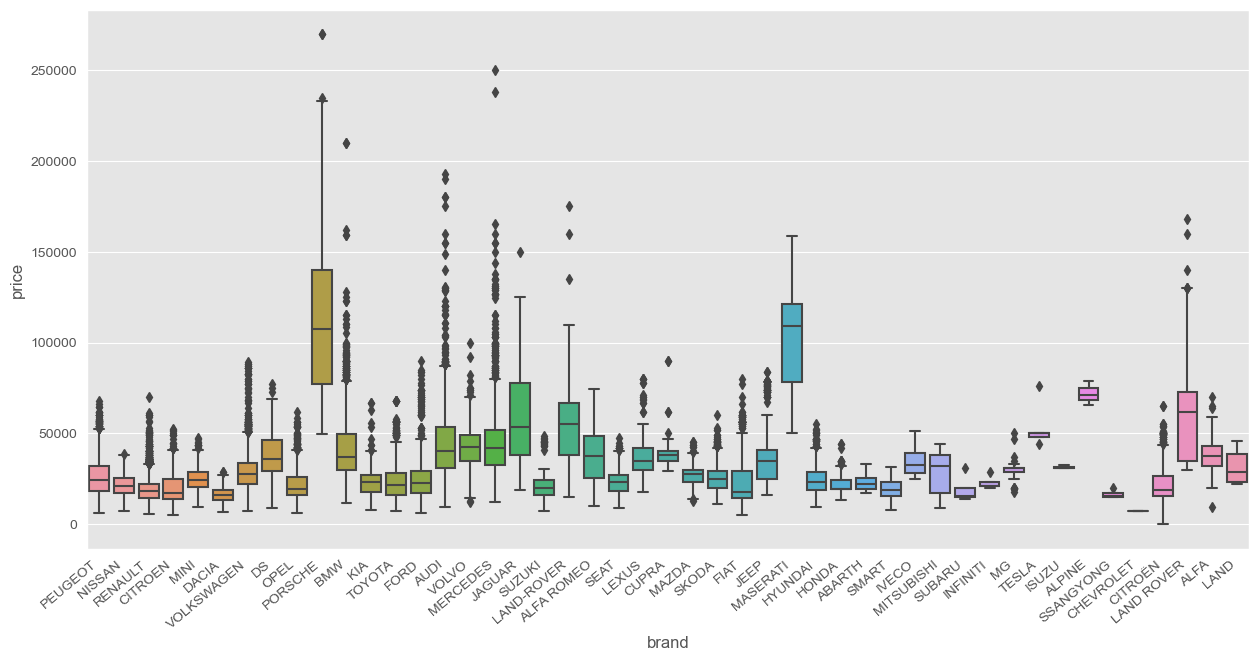

In [21]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='brand',y='price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [22]:
# plt.subplots(figsize=(20,10))
# ax=sns.swarmplot(x='year',y='price',data=car)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
# plt.show()

In [23]:
# sns.relplot(x='gear_box',y='price',data=car,height=7,aspect=1.5)

In [24]:
# plt.subplots(figsize=(14,7))
# sns.boxplot(x='gear_box',y='price',data=car)

In [25]:
# ax=sns.relplot(x='brand',y='price',data=car,hue='gear_box',size='year',height=7,aspect=2)
# ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [26]:
X=car[['model','brand','gear_box']]
y=car['price']

In [27]:
X

,model,brand,gear_box
0,2008,PEUGEOT,Automatique
1,Qashqai,NISSAN,Manuelle
2,Captur,RENAULT,Manuelle
3,Kadjar,RENAULT,Manuelle
4,2008,PEUGEOT,Manuelle
...,...,...,...
44344,308,PEUGEOT,Manuelle
44345,JUMPY,CITROËN,Manuelle
44346,C3,CITROËN,Manuelle
44347,ROVER RANGE,LAND,Manuelle


In [28]:
y.shape

(44349,)

### Applying Train Test Split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#### Creating an OneHotEncoder object to contain all the possible categories

In [30]:
ohe=OneHotEncoder()
ohe.fit(X[['model','brand','gear_box']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [31]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['model','brand','gear_box']),
                                    remainder='passthrough')
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['107', '108', '2', '2008', '206+', '207', '207 Cc', '208', '3',
       '3 CABRIO', '3 CROSSBACK', '3008', '308', '308 CC', '308 SW',
       '308 Sw', '370z', '4', '4 CROSSBACK', '5', '500', '5008', '500L',
       '500X', '500c', '500l', '500l Living', '500x', '508',
       '508 Hybrid4', '508 SW', '508 Sw', '595',...
       'JEEP', 'KIA', 'LAND', 'LAND ROVER', 'LAND-ROVER', 'LEXUS',
       'MASERATI', 'MAZDA', 'MERCEDES', 'MG', 'MINI', 'MITSUBISHI',
       'NISSAN', 'OPEL', 'PEUGEOT', 'PORSCHE', 'RENAULT', 'SEAT', 'SKODA',
       'SMART', 'SSANGYONG', 'SUBARU', 'SUZUKI', 'TESLA', 'TOYOTA',
       'VOLKSWAGEN', 'VOLVO'], dtype=object),
                                                           array(['Automatique', 'Manuelle', 'Robotisée'], dtype=object)]),
                                 ['model', 'brand', 'gear_box'])])

#### Linear Regression Model

In [32]:
lr=LinearRegression()

#### Making a pipeline

In [33]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [34]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['107', '108', '2', '2008', '206+', '207', '207 Cc', '208', '3',
       '3 CABRIO', '3 CROSSBACK', '3008', '308', '308 CC', '308 SW',
       '308 Sw', '370z', '4', '4 CROSSBACK', '5', '500', '5008', '500L',
       '500X', '500c', '500l', '500l Living', '500x', '508...
       'JEEP', 'KIA', 'LAND', 'LAND ROVER', 'LAND-ROVER', 'LEXUS',
       'MASERATI', 'MAZDA', 'MERCEDES', 'MG', 'MINI', 'MITSUBISHI',
       'NISSAN', 'OPEL', 'PEUGEOT', 'PORSCHE', 'RENAULT', 'SEAT', 'SKODA',
       'SMART', 'SSANGYONG', 'SUBARU', 'SUZUKI', 'TESLA', 'TOYOTA',
       'VOLKSWAGEN', 'VOLVO'], dtype=object),
                                                                            array(['Automatique', 'Manuelle', 'Robotisée'], dtype=object)]),
                   

In [47]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [48]:
r2_score(y_test,y_pred)

0.8081128747267712

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.80 as r2_score

In [49]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [38]:
np.argmax(scores)

970

In [39]:
scores[np.argmax(scores)]

0.8081128747267712

In [40]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Qashqai','NISSAN','Automatique']).reshape(1,3)))

array([30054.54804637])

#### The best model is found at a certain random state 

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8081128747267712

In [42]:
pickle.dump(pipe,open('CarPricePredict.pkl','wb'))

In [43]:
pipe.predict(pd.DataFrame(columns=['model','brand','gear_box'],data=np.array(['Qashqai','NISSAN','Automatique']).reshape(1,3)))

array([29923.09225115])

In [44]:
pipe.predict(pd.DataFrame(columns=['model','brand','gear_box'],data=np.array(['Qashqai','NISSAN','Automatique']).reshape(1,3)))

array([29923.09225115])